In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## **Cleaning up the data**  

In [11]:
def outputCheck(df):
    if(df.columns.size >0):
        print("■■■■■ Pass■■■■■")           
    else:
        print("Error the dataframe is empty or null")

In [12]:
df =pd.read_csv("data/new_fire_weather_data.csv")

outputCheck(df)
#df =df.drop(columns=["Unnamed: 0"])
df.head

■■■■■ Pass■■■■■


<bound method NDFrame.head of       Unnamed: 0     incident_name incident_date_created  \
0              0       Bridge Fire   2017-10-31 11:22:00   
1              1     Fawnskin Fire   2013-04-20 17:30:00   
2              2         Gold Fire   2013-04-30 12:59:00   
3              3    Silverado Fire   2013-04-30 23:44:00   
4              4       Yellow Fire   2013-05-01 02:01:00   
...          ...               ...                   ...   
1238        1238       Sheep Fire    2020-08-22 22:02:57   
1239        1239        Hobo Fire    2020-09-01 09:37:58   
1240        1240          Oak Fire   2020-09-07 13:26:45   
1241        1241       Willow Fire   2020-09-09 06:04:43   
1242        1242  Schoolhouse Fire   2020-09-09 15:59:31   

                           incident_administrative_unit incident_county  \
0                       Shasta-Trinity National Forest           Shasta   
1                        San Bernardino National Forest  San Bernardino   
2                  CAL F

In [13]:
#df.to_csv("fire_weather_data.csv",index=False)
#nand=[]
#for i in range(len(df)-1,-1,-1):
#    for ele in df.iloc[i]:
#        if str(ele)== "nan":
#            df=df.drop(df.index[i])
#           break


In [14]:
#df =df.drop(columns=["Unnamed: 0","Unnamed: 0.1","Unnamed: 0.1.1","Unnamed: 0.1.1.1","Unnamed: 0.1.1.1.1"])

In [15]:
#dont need after first run
df.to_csv("data/new_fire_weather_data.csv")

In [16]:
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

## **Creating a linear model**

In [17]:
outputCheck(df)
df =df[df.incident_acres_burned>100]
df =df[df.incident_acres_burned <200000]
df

■■■■■ Pass■■■■■


,Unnamed: 0,incident_name,incident_date_created,incident_administrative_unit,incident_county,incident_location,incident_acres_burned,incident_cooperating_agencies,incident_longitude,incident_latitude,...,Min Temperature,Dew Point,Precipitation,Snowdepth,Wind,Gust Wind,Sea Level Pressure,elevation,county_population,county_income
2,2,Gold Fire,2013-04-30 12:59:00,CAL FIRE Madera-Mariposa-Merced Unit,Madera,Between Road 210 and Road 200 near Fine Gold C...,274,CAL FIRE Madera-Mariposa-Merced Unit,-119.635004,37.116295,...,63.29,40.10,0.00,0.0,6.08,0.60,29.51,484.616089,151338,50783
4,4,Yellow Fire,2013-05-01 02:01:00,CAL FIRE Sonoma-Lake-Napa Unit,Sonoma,Hwy 128 & Yellow Jacket Ranch Rd in Knights Va...,125,CAL FIRE Sonoma-Lake-Napa Unit,-122.655616,38.638828,...,47.00,39.54,0.00,0.0,5.01,2.21,29.72,255.670990,491980,79511
5,5,Summit Fire,2013-05-01 12:38:00,CAL FIRE/Riverside County Fire,Riverside,Mias Canyon and Bluff Road in Banning,3166,CAL FIRE/Riverside County Fire,-116.941311,34.288877,...,55.29,35.28,0.00,0.0,5.59,1.54,28.67,2411.368408,2265789,63776
6,6,Tres Pinos Fire,2013-05-03 11:42:00,CAL FIRE San Benito-Monterey,San Benito,"Highway 25 and Horizon Rd, Community of Tres",354,CAL FIRE San Benito-Monterey,-120.937494,37.160346,...,55.71,41.68,0.00,0.0,6.71,1.42,29.84,24.833916,55998,77200
7,7,306 Fire,2013-05-01 19:00:00,CAL FIRE Tehama-Glenn Unit,Glenn,2 miles south of the community of Elk Creek,217,CAL FIRE Tehama-Glenn Unit,-122.560862,39.514139,...,60.86,27.52,0.00,0.0,11.47,9.79,29.41,526.162109,28424,49979
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1236,1236,Creek Fire,2020-08-18 17:58:52,CAL FIRE Mendocino Unit,Mendocino,"Covelo, Highway 162 and Short Creek Rd",820,Cooperating Agencies: California Department of...,-123.211101,39.817437,...,59.29,51.48,0.01,0.0,4.58,0.00,29.11,418.601074,89299,50453
1237,1237,Moc Fire,2020-08-20 14:26:08,CAL FIRE Tuolumne-Calaveras Unit and Central C...,Tuolumne,"Hwy 49 and Hwy 120, Moccasin",2857,CAL FIRE Tuolumne-Calaveras Unit,-120.312565,37.813779,...,73.14,55.08,0.00,0.0,8.25,1.08,29.80,293.668060,54740,58776
1238,1238,Sheep Fire,2020-08-22 22:02:57,"Unified Command: Plumas National Forest, Lasse...",Plumas,"Gold Run Road, Southwest of Susanville in Plum...",29570,Plumas National Forest,-120.757000,40.274000,...,59.29,51.48,0.01,0.0,4.58,0.00,29.11,1614.909912,19773,51756
1240,1240,Oak Fire,2020-09-07 13:26:45,CAL FIRE MEU Mendocino Unit,Mendocino,West of Highway 101--Big John Road & Skyview R...,1100,"CAL FIRE Mendocino Unit , Cooperating Agencies...",-123.396500,39.493500,...,55.14,51.73,0.00,0.0,2.73,0.51,29.72,588.767822,89299,50453


In [18]:
size=99
state =45
train_fire_x,test_fire_x,train_fire_target,test_fire_target=train_test_split(df.drop(columns=["incident_latitude","incident_longitude","incident_date_created","incident_name","incident_administrative_unit","incident_county","incident_location","incident_cooperating_agencies","incident_acres_burned","incident_date_extinguished","incident_dateonly_extinguished","incident_dateonly_created","Precipitation","Snowdepth","Sea Level Pressure"]), df['incident_acres_burned'], test_size=1-size/100,random_state=state)
outputCheck(train_fire_x)
outputCheck(test_fire_x)
test_fire_x
test_fire_target


■■■■■ Pass■■■■■
■■■■■ Pass■■■■■


884      1500
355       550
121      1952
608       690
734     18900
1046      160
Name: incident_acres_burned, dtype: int64

In [19]:
regression_line =linear_model.LinearRegression()
regression_line.fit(train_fire_x,train_fire_target)

predictions =regression_line.predict(test_fire_x)

In [20]:
tft=[y for y in test_fire_target]
for i in range(len(tft)):
    print(f'Prediction:{predictions[i]}--Answer:{tft[i]}')




Prediction:2709.787611959853--Answer:1500
Prediction:3701.683894902344--Answer:550
Prediction:6001.477831479953--Answer:1952
Prediction:2942.77707271731--Answer:690
Prediction:11482.380933340768--Answer:18900
Prediction:2340.6112264998646--Answer:160


In [21]:
print(mean_squared_error(tft,predictions))
print(r2_score(tft,predictions))


15441018.43760842
0.6569275694914677


In [22]:
import matplotlib.pyplot as plt
#i need to create comparisons between all the vars


## **Comparing the variables and the Outputs**

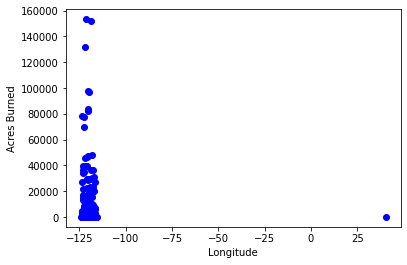

In [23]:
#most longitude and lats are very similar and not enough data to have accurate data for area in the specific coords
arr=df.incident_longitude
ans=df.incident_acres_burned
#plotting it
plt.scatter(arr,ans,color='Blue')
#lables
plt.xlabel("Longitude")
plt.ylabel("Acres Burned")


plt.show()

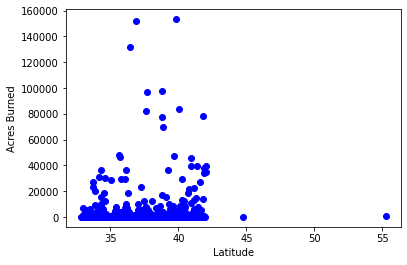

In [24]:
arr=df.incident_latitude
ans=df.incident_acres_burned
#plotting it
plt.scatter(arr,ans,color='Blue')
#lables
plt.xlabel("Latitude")
plt.ylabel("Acres Burned")


plt.show()

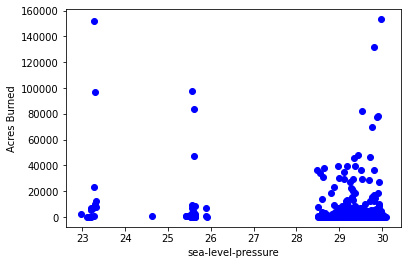

In [25]:
arr=df["Sea Level Pressure"]
ans=df.incident_acres_burned
#plotting it
plt.scatter(arr,ans,color='Blue')
#lables
plt.xlabel("sea-level-pressure")
plt.ylabel("Acres Burned")


plt.show()

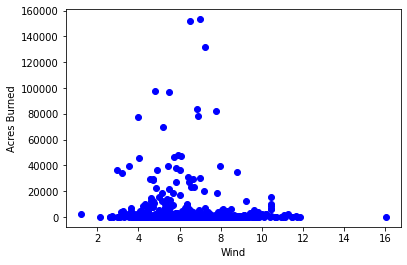

In [26]:
arr=df["Wind"]
ans=df.incident_acres_burned
#plotting it
plt.scatter(arr,ans,color='Blue')
#lables
plt.xlabel("Wind")
plt.ylabel("Acres Burned")


plt.show()

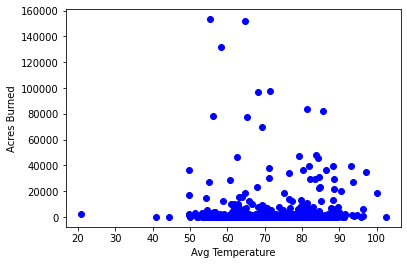

In [27]:
arr=df["Avg Temperature"]
ans=df.incident_acres_burned
#plotting it
plt.scatter(arr,ans,color='Blue')
#lables
plt.xlabel("Avg Temperature")
plt.ylabel("Acres Burned")


plt.show()

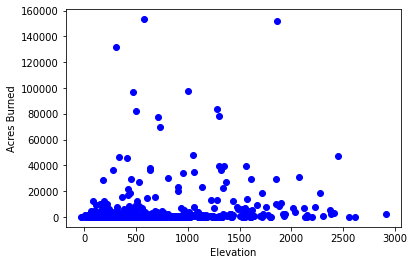

In [28]:
arr=df.elevation
ans=df.incident_acres_burned
#plotting it
plt.scatter(arr,ans,color='Blue')
#lables
plt.xlabel("Elevation")
plt.ylabel("Acres Burned")


plt.show()
#fires usually do not grow to large sizes at higher elevations
#most fires occured below 1500 meters
#more info on how topography and altitude and day cycle affect fires is below
# https://www.fs.fed.us/rm/pubs_exp_for/priest_river/exp_for_priest_river_1942_hayes02.pdf


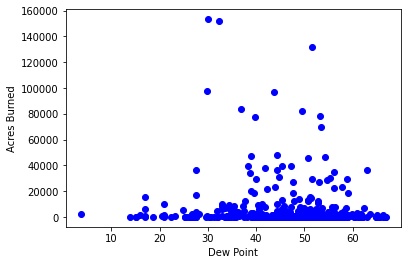

In [29]:
arr=df["Dew Point"]
ans=df.incident_acres_burned
#plotting it
plt.scatter(arr,ans,color='Blue')
#lables
plt.xlabel("Dew Point")
plt.ylabel("Acres Burned")


plt.show()
#Dew Point is the atmospheric pressure that it takes for water drops to condense and form
#dew point has an effect on the rate of fires because lowers can cause lower moistures in
#fuels at the bottom of a forrest
# https://www.dfes.wa.gov.au/waemergencyandriskmanagement/obrm/Documents/Relative-Humidity-and-Dew-Point-Information-Sheet.pdf
#this does not exactly agree with my results it seems that between 60-30 most fires occur
#the temperature also must be affected by air temperature and below 30ish its too cold for fires

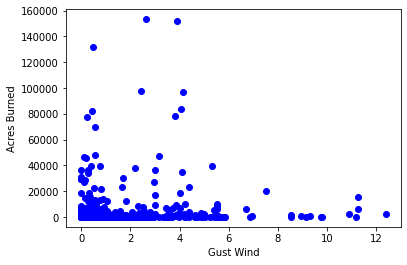

In [30]:
arr=df["Gust Wind"]
ans=df.incident_acres_burned
#plotting it
plt.scatter(arr,ans,color='Blue')
#lables
plt.xlabel("Gust Wind")
plt.ylabel("Acres Burned")


plt.show()
#there is a consistent outlier of the thomas fire which occured in the winter time, but 
#gree to be one of the largest fires in  cali becasue of other codnitions
#this fire has low dew point  and high winds
# more info can be found below on the wiki  
#  https://en.wikipedia.org/wiki/Thomas_Fire

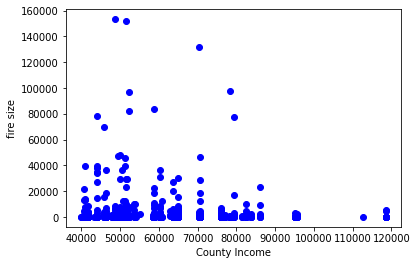

In [31]:
arr=df.county_income
ans =df.incident_acres_burned
 
plt.scatter(arr,ans,c='Blue')
plt.xlabel("County Income")
plt.ylabel("fire size")


plt.show()

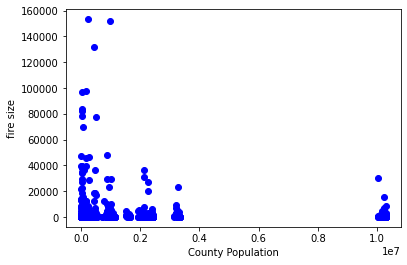

In [32]:
arr=df.county_population
ans =df.incident_acres_burned
 
plt.scatter(arr,ans,c='Blue')
plt.xlabel("County Population")
plt.ylabel("fire size")


plt.show()

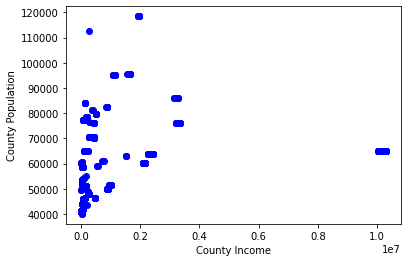

In [33]:
ans=df.county_income
arr =df.county_population
 
plt.scatter(arr,ans,c='Blue')
plt.xlabel("County Income")
plt.ylabel("County Population")


plt.show()

In [38]:
#graph of average fire size
totalAcres=0
average_fire=[]
dates=[]
print(df.sort_values(by="incident_date_created").size)
for i in range(df.sort_values(by="incident_date_created").size):
    if i ==0:
        continue

    totalAcres+=df.sort_values(by="incident_date_created").iloc[i].incident_acres_burned
    average_fire.append(totalAcres/i)
    dates.append(df.sort_values(by="incident_date_created").iloc[i].incident_dateonly_created)
average_fire[0].pop()
dates[0].pop()


14900


IndexError: single positional indexer is out-of-bounds

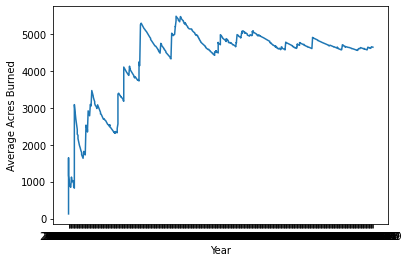

In [39]:
plt.plot(dates, average_fire)

plt.xlabel("Year")
plt.ylabel("Average Acres Burned")


plt.show()
#This a plot of the average fire size over the years which could mean that date is an important factor to fire size

## Feature Selections

In [41]:
from sklearn.feature_selection import RFE, SelectFromModel

In [44]:
vars=df.drop(columns=[
"incident_name",
"incident_date_created",
"incident_administrative_unit",
"incident_county",
"incident_cooperating_agencies",
"incident_dateonly_extinguished",
"incident_date_extinguished",
"Snowdepth",
"Sea Level Pressure",
"incident_location",
"incident_acres_burned",
"Precipitation"])
incidents_fire_date = pd.to_datetime(vars.incident_dateonly_created)

vars["year"]=pd.DatetimeIndex(incidents_fire_date).year
vars["month"]=pd.DatetimeIndex(incidents_fire_date).month
vars["day"]=pd.DatetimeIndex(incidents_fire_date).day
vars=vars.drop(columns=["incident_dateonly_created"])

In [45]:
rfe_estimator =RFE(estimator=linear_model.LinearRegression(),n_features_to_select=7,step=1,verbose=5)
rfe_estimator.fit(vars,df.incident_acres_burned)
rfe_support=rfe_estimator.get_support()
rfe_feature=vars.loc[:,rfe_support].columns.tolist()
print(str(rfe_feature), 'selected features')

Fitting estimator with 15 features.
Fitting estimator with 14 features.
Fitting estimator with 13 features.
Fitting estimator with 12 features.
Fitting estimator with 11 features.
Fitting estimator with 10 features.
Fitting estimator with 9 features.
Fitting estimator with 8 features.
['incident_latitude', 'Max Temperature', 'Avg Temperature', 'Min Temperature', 'Wind', 'Gust Wind', 'month'] selected features


In [46]:
selected_features =vars.loc[:,['incident_latitude',"Max Temperature","Avg Temperature","Min Temperature","Wind","Gust Wind","month"]]
selected_features

,incident_latitude,Max Temperature,Avg Temperature,Min Temperature,Wind,Gust Wind,month
2,37.116295,92.00,77.98,63.29,6.08,0.60,4
4,38.638828,88.71,65.77,47.00,5.01,2.21,5
5,34.288877,87.14,75.65,55.29,5.59,1.54,5
6,37.160346,85.14,69.29,55.71,6.71,1.42,5
7,39.514139,87.00,73.86,60.86,11.47,9.79,5
...,...,...,...,...,...,...,...
1236,39.817437,98.14,83.60,59.29,4.58,0.00,8
1237,37.813779,102.57,87.41,73.14,8.25,1.08,8
1238,40.274000,98.14,83.60,59.29,4.58,0.00,8
1240,39.493500,87.29,67.07,55.14,2.73,0.51,9


In [47]:
size=99
state =45
train_vars,test_vars,train_results,test_results=train_test_split(selected_features, df['incident_acres_burned'], test_size=1-size/100,random_state=state)
outputCheck(train_fire_x)
outputCheck(test_fire_x)

■■■■■ Pass■■■■■
■■■■■ Pass■■■■■


In [48]:
reg_line =linear_model.LinearRegression()
reg_line.fit(train_vars,train_results)
print(f'Coeffecients of the linear model{reg_line.coef_}')

predictions =reg_line.predict(test_vars)

Coeffecients of the linear model[ 513.19367159 -142.31908985  322.04964664 -217.28117015 -935.94672804
  734.44121636  435.68916335]


In [49]:
tft=[y for y in test_results]
for i in range(len(tft)):
    print(f'Prediction:{predictions[i]}--Answer:{tft[i]}')




Prediction:907.0534664569186--Answer:1500
Prediction:7525.087134677935--Answer:550
Prediction:5309.015838781246--Answer:1952
Prediction:3147.4468333903496--Answer:690
Prediction:4584.230022617336--Answer:18900
Prediction:5006.293512956057--Answer:160
